In [312]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [314]:
df = pd.read_csv('ViewingActivity.csv')
print(df.shape)

(15545, 10)


In [316]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ana,2025-04-02 03:54:13,00:40:54,NaN,Judge Dee's Mystery: Season 1: Episode 9,NaN,Comcast X1 ARM 4K MVPD STB,00:41:11,00:41:11,CA (Canada)
1,Ana,2025-04-02 03:01:26,00:42:27,NaN,Judge Dee's Mystery: Season 1: Episode 8,NaN,Comcast X1 ARM 4K MVPD STB,00:42:28,00:42:28,CA (Canada)
2,Ana,2025-04-01 21:15:48,00:00:08,Autoplayed: user action: None;,The Untamed: Season 1_hook_04_16x9,HOOK,Comcast X1 ARM 4K MVPD STB,00:00:08,00:00:08,CA (Canada)
3,Ana,2025-04-01 03:45:50,00:00:12,Autoplayed: user action: None;,Judge Dee's Mystery: Season 1: Episode 8,NaN,Comcast X1 ARM 4K MVPD STB,00:00:29,Not latest view,CA (Canada)
4,Ana,2025-04-01 02:46:20,00:37:55,NaN,Judge Dee's Mystery: Season 1: Episode 7,NaN,Comcast X1 ARM 4K MVPD STB,00:39:23,00:39:23,CA (Canada)


In [318]:
df["Profile Name"].unique()

array(['Ana', 'Daniel', 'Kids', 'Test'], dtype=object)

In [320]:
len(df["Title"].unique())

5041

In [322]:
df["Device Type"].unique()

array(['Comcast X1 ARM 4K MVPD STB',
       'Android DefaultWidevineL3Phone Android Phone',
       'Google Chromecast V5 Streaming Stick',
       'DefaultWidevineAndroidPhone', 'Chrome PC (Cadmium)',
       'Edge OSS - Windows (Cadmium)', 'Firefox PC (Cadmium)',
       'Compal L621 Smart TV', 'Google Sabrina ATV Set Top Box'],
      dtype=object)

In [324]:
df.count()

Profile Name               15545
Start Time                 15545
Duration                   15545
Attributes                  1586
Title                      15545
Supplemental Video Type     1778
Device Type                15545
Bookmark                   15545
Latest Bookmark            15545
Country                    15545
dtype: int64

In [326]:
titles = df['Title'].value_counts()

In [328]:
titles.shape

(5041,)

In [408]:
titles

Title
Superstore: Season 5: Sandra's Wedding (Episode 14)                                83
Superstore: Season 2: Rebranding (Episode 12)                                      73
White Chicks                                                                       63
NoGlobalVideo-CannotLocalize-81685463-en                                           59
Season 1 Trailer: The Seven Deadly Sins: Four Knights of the Apocalypse            59
                                                                                   ..
House, M.D.: Season 7: After Hours (Episode 22)                                     1
House, M.D.: Season 7: Last Temptation (Episode 19)                                 1
House, M.D.: Season 7: The Dig (Episode 18)                                         1
House, M.D.: Season 7: Larger than Life (Episode 9)                                 1
LEGO Ninjago: Masters of Spinjitzu: Sons of Garmadon: The Quiet One (Episode 6)     1
Name: count, Length: 5041, dtype: int64

In [412]:
titles = titles.drop(labels = 'NoGlobalVideo-CannotLocalize-81685463-en')

In [414]:
titles

Title
Superstore: Season 5: Sandra's Wedding (Episode 14)                                83
Superstore: Season 2: Rebranding (Episode 12)                                      73
White Chicks                                                                       63
Season 1 Trailer: The Seven Deadly Sins: Four Knights of the Apocalypse            59
Season 1 Trailer: SAKAMOTO DAYS                                                    59
                                                                                   ..
House, M.D.: Season 7: After Hours (Episode 22)                                     1
House, M.D.: Season 7: Last Temptation (Episode 19)                                 1
House, M.D.: Season 7: The Dig (Episode 18)                                         1
House, M.D.: Season 7: Larger than Life (Episode 9)                                 1
LEGO Ninjago: Masters of Spinjitzu: Sons of Garmadon: The Quiet One (Episode 6)     1
Name: count, Length: 5040, dtype: int64

In [416]:
nonunique_titles = titles[titles > 1]

In [418]:
nonunique_titles

Title
Superstore: Season 5: Sandra's Wedding (Episode 14)                                         83
Superstore: Season 2: Rebranding (Episode 12)                                               73
White Chicks                                                                                63
Season 1 Trailer: The Seven Deadly Sins: Four Knights of the Apocalypse                     59
Season 1 Trailer: SAKAMOTO DAYS                                                             59
                                                                                            ..
The Disastrous Life of Saiki K.: Season 2: Episode 24                                        2
The Magic School Bus: Season 1: The Magic School Bus Gets Ants In Its Pants (Episode 12)     2
Pokémon The Series: Indigo League: Season 1: Bulbasaur's Mysterious Garden (Episode 48)      2
Naruto Shippuden: Season 8: The Two Students (Episode 169)                                   2
Riverdale: Season 3: Chapter Forty-One: Manh

In [420]:
nonunique_titles.shape

(2355,)

In [422]:
profs = df['Profile Name'].value_counts()

In [424]:
profs

Profile Name
Daniel    14177
Ana        1205
Test        153
Kids         10
Name: count, dtype: int64

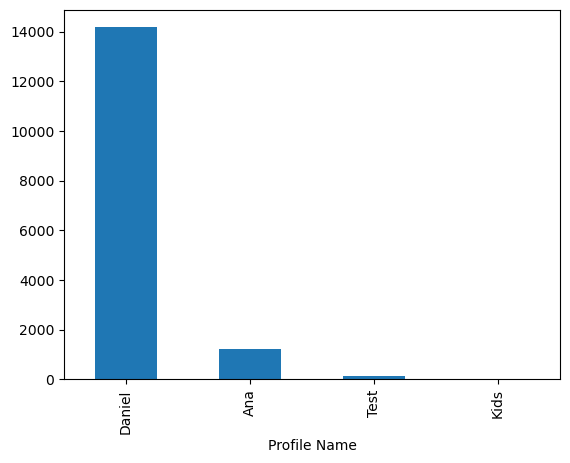

In [426]:
%matplotlib inline
profs.plot(kind='bar')
plt.show()

In [428]:
overten = titles[titles >= 10]
overtwenty = titles[titles >= 20]
overthirty = titles[titles >= 30]
overforty = titles[titles >= 40]
overfifty = titles[titles >= 50]
oversixty = titles[titles >= 60]
overseventy = titles[titles >= 70]
overeighty = titles[titles >= 80]

In [430]:
overten.shape

(283,)

In [432]:
overfifty.shape

(9,)

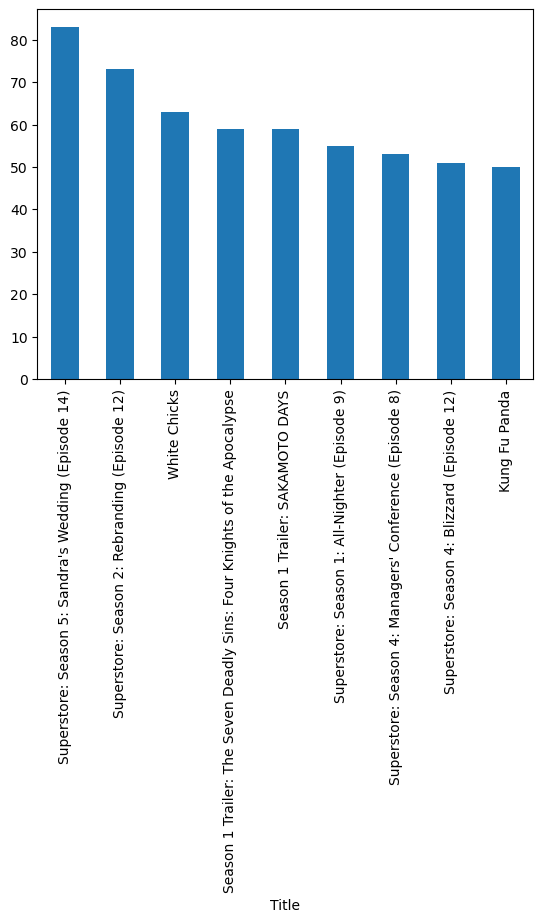

In [434]:
overfifty.plot(kind = 'bar')
plt.show()

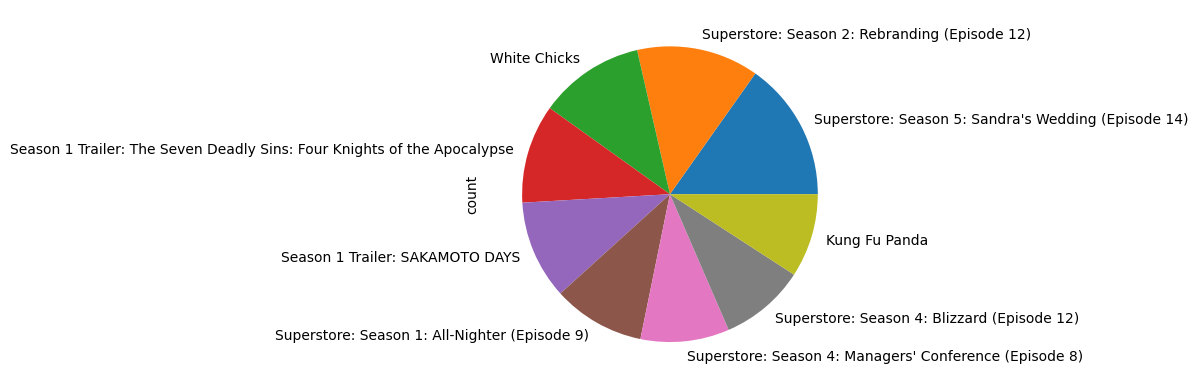

In [436]:
overfifty.plot(kind='pie')
plt.show()

In [438]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Duration'] = pd.to_timedelta(df['Duration'])

In [440]:
df['Duration'].sum()

Timedelta('116 days 19:08:58')

In [442]:
ana_devices = df.loc[df['Profile Name'] == 'Ana', 'Device Type'].value_counts()

In [444]:
daniel_devices = df.loc[df['Profile Name'] == 'Daniel', 'Device Type'].value_counts()

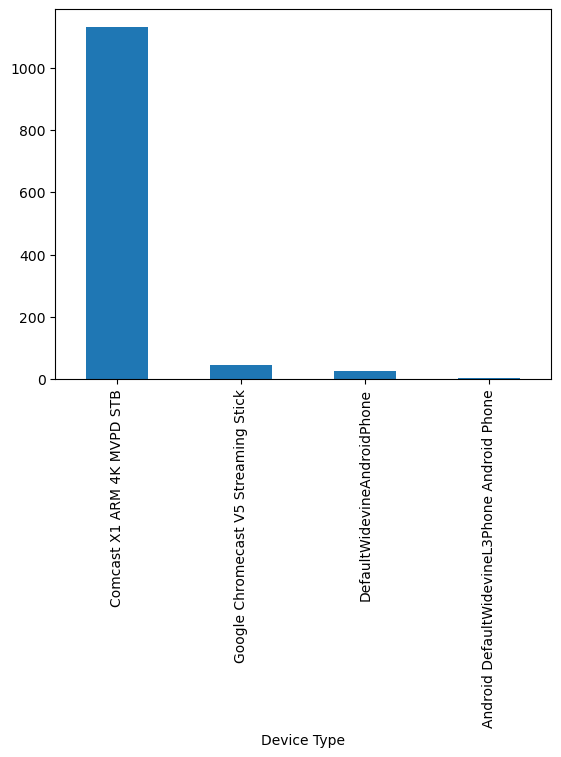

In [446]:
%matplotlib inline
ana_devices.plot(kind='bar')
plt.show()

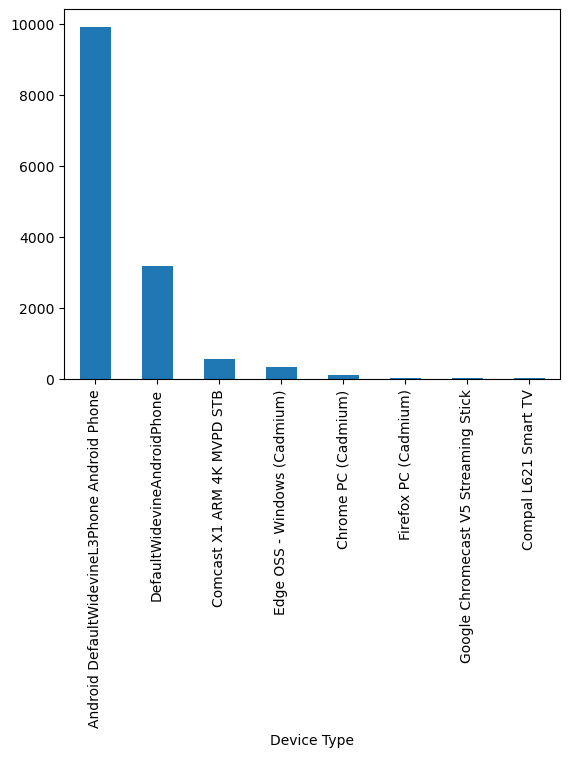

In [448]:
%matplotlib inline
daniel_devices.plot(kind='bar')
plt.show()

In [450]:
df.loc[df['Profile Name'] == 'Ana', 'Duration'].sum()

Timedelta('21 days 15:11:00')

In [452]:
df.loc[df['Profile Name'] == 'Daniel', 'Duration'].sum()

Timedelta('93 days 23:48:53')

In [454]:
anas_df = df.loc[df['Profile Name'] == 'Ana']

In [456]:
anas_df

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ana,2025-04-02 03:54:13+00:00,0 days 00:40:54,NaN,Judge Dee's Mystery: Season 1: Episode 9,NaN,Comcast X1 ARM 4K MVPD STB,00:41:11,00:41:11,CA (Canada)
1,Ana,2025-04-02 03:01:26+00:00,0 days 00:42:27,NaN,Judge Dee's Mystery: Season 1: Episode 8,NaN,Comcast X1 ARM 4K MVPD STB,00:42:28,00:42:28,CA (Canada)
2,Ana,2025-04-01 21:15:48+00:00,0 days 00:00:08,Autoplayed: user action: None;,The Untamed: Season 1_hook_04_16x9,HOOK,Comcast X1 ARM 4K MVPD STB,00:00:08,00:00:08,CA (Canada)
3,Ana,2025-04-01 03:45:50+00:00,0 days 00:00:12,Autoplayed: user action: None;,Judge Dee's Mystery: Season 1: Episode 8,NaN,Comcast X1 ARM 4K MVPD STB,00:00:29,Not latest view,CA (Canada)
4,Ana,2025-04-01 02:46:20+00:00,0 days 00:37:55,NaN,Judge Dee's Mystery: Season 1: Episode 7,NaN,Comcast X1 ARM 4K MVPD STB,00:39:23,00:39:23,CA (Canada)
...,...,...,...,...,...,...,...,...,...,...
1200,Ana,2023-05-20 00:55:02+00:00,0 days 00:00:06,NaN,The Queen and the Conqueror: Season 1: Episode 1,NaN,DefaultWidevineAndroidPhone,00:14:02,00:14:02,CA (Canada)
1201,Ana,2023-05-20 00:53:35+00:00,0 days 00:00:24,NaN,Frontier: Season 1: A Kingdom Unto Itself (Epi...,NaN,DefaultWidevineAndroidPhone,00:00:46,00:00:46,CA (Canada)
1202,Ana,2023-05-20 00:47:24+00:00,0 days 00:04:14,NaN,The Queen and the Conqueror: Season 1: Episode 1,NaN,DefaultWidevineAndroidPhone,00:13:59,Not latest view,CA (Canada)
1203,Ana,2023-05-20 00:43:07+00:00,0 days 00:03:40,NaN,The Queen and the Conqueror: Season 1: Episode 1,NaN,DefaultWidevineAndroidPhone,00:08:02,Not latest view,CA (Canada)


In [458]:
daniels_df = df.loc[df['Profile Name'] == 'Daniel']

In [460]:
daniels_df

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
1205,Daniel,2025-04-02 02:54:43+00:00,0 days 00:04:18,NaN,Spirited Away,NaN,DefaultWidevineAndroidPhone,00:52:26,00:52:26,CA (Canada)
1206,Daniel,2025-04-01 19:12:35+00:00,0 days 00:04:11,NaN,Superstore: Season 2: Halloween Theft (Episode 7),NaN,DefaultWidevineAndroidPhone,00:06:45,00:06:45,CA (Canada)
1207,Daniel,2025-03-31 23:13:10+00:00,0 days 00:38:16,NaN,Spirited Away,NaN,DefaultWidevineAndroidPhone,01:18:00,Not latest view,CA (Canada)
1208,Daniel,2025-03-31 18:17:04+00:00,0 days 01:15:35,NaN,Spirited Away,NaN,DefaultWidevineAndroidPhone,01:55:18,Not latest view,CA (Canada)
1209,Daniel,2025-03-31 16:57:13+00:00,0 days 00:15:12,NaN,Spirited Away,NaN,DefaultWidevineAndroidPhone,00:39:45,Not latest view,CA (Canada)
...,...,...,...,...,...,...,...,...,...,...
15377,Daniel,2023-05-12 05:30:49+00:00,0 days 00:00:06,NaN,NoGlobalVideo-CannotLocalize-81167708-en,HOOK,DefaultWidevineAndroidPhone,00:00:06,00:00:06,CA (Canada)
15378,Daniel,2023-05-12 05:30:47+00:00,0 days 00:00:02,NaN,Breaking Bad: Season 1: The Cat's in the Bag (...,NaN,Compal L621 Smart TV,00:00:02,Not latest view,CA (Canada)
15379,Daniel,2023-05-12 05:30:30+00:00,0 days 00:00:03,NaN,Breaking Bad: Season 1: The Cat's in the Bag (...,NaN,Compal L621 Smart TV,00:00:03,Not latest view,CA (Canada)
15380,Daniel,2023-05-12 05:28:53+00:00,0 days 00:00:32,NaN,Breaking Bad: Season 1: The Cat's in the Bag (...,NaN,DefaultWidevineAndroidPhone,00:00:31,Not latest view,CA (Canada)


In [462]:
anas_titles = anas_df['Title'].value_counts()

In [464]:
anas_titles

Title
La Reina del Sur: Season 3: Hiding Is Not an Option (Episode 29)    7
Murder Mystery 2                                                    7
The Royal Princess: Season 1_hook_02_16x9                           6
La Reina del Sur: Season 3: Going to London (Episode 13)            6
Trailer: Queen of Tears                                             6
                                                                   ..
The Longest Promise: Season 1: Episode 22                           1
The Longest Promise: Season 1: Episode 21                           1
The Longest Promise: Season 1: Episode 18                           1
The Longest Promise: Season 1: Episode 17                           1
Frontier: Season 1: A Kingdom Unto Itself (Episode 1)               1
Name: count, Length: 817, dtype: int64

In [466]:
anas_uniques = anas_titles[anas_titles > 1]

In [468]:
anas_uniques

Title
La Reina del Sur: Season 3: Hiding Is Not an Option (Episode 29)    7
Murder Mystery 2                                                    7
The Royal Princess: Season 1_hook_02_16x9                           6
La Reina del Sur: Season 3: Going to London (Episode 13)            6
Trailer: Queen of Tears                                             6
                                                                   ..
Judge Dee's Mystery: Season 1: Episode 6                            2
The Princess Royal: Season 1: Episode 18                            2
100 Days My Prince: Limited Series: Episode 14                      2
Judge Dee's Mystery: Season 1: Episode 5                            2
The Princess Royal: Season 1: Episode 21                            2
Name: count, Length: 284, dtype: int64

In [470]:
anas_uniques.shape

(284,)

In [472]:
daniels_titles = daniels_df['Title'].value_counts()

In [474]:
daniels_titles

Title
Superstore: Season 5: Sandra's Wedding (Episode 14)                        83
Superstore: Season 2: Rebranding (Episode 12)                              73
White Chicks                                                               63
Season 1 Trailer: SAKAMOTO DAYS                                            59
Season 1 Trailer: The Seven Deadly Sins: Four Knights of the Apocalypse    59
                                                                           ..
NoGlobalVideo-CannotLocalize-81108271-en                                    1
Haikyu!!: Season 1: The Point That Changes the Momentum (Episode 23)        1
Haikyu!!: Season 1: Senpai's True Abilities (Episode 21)                    1
Haikyu!!: Season 1: Oikawa Toru is not a Genius (Episode 20)                1
NoGlobalVideo-CannotLocalize-81167708-en                                    1
Name: count, Length: 4160, dtype: int64

In [476]:
daniels_uniques = daniels_titles[daniels_titles > 1]

In [478]:
daniels_uniques

Title
Superstore: Season 5: Sandra's Wedding (Episode 14)                                  83
Superstore: Season 2: Rebranding (Episode 12)                                        73
White Chicks                                                                         63
Season 1 Trailer: SAKAMOTO DAYS                                                      59
Season 1 Trailer: The Seven Deadly Sins: Four Knights of the Apocalypse              59
                                                                                     ..
Riverdale: Season 7: Chapter One Hundred and Twenty Five: Hoop Dreams (Episode 8)     2
LEGO Ninjago: Masters of Spinjitzu: Sons of Garmadon: Snake Jaguar (Episode 4)        2
Gossip Girl: Season 3: The Lost Boy (Episode 3)                                       2
House, M.D.: Season 6: Broken: Part 2 (Episode 2)                                     2
The Office (U.S.): Season 1: Pilot (Episode 1)                                        2
Name: count, Length: 2045,

In [480]:
daniels_uniques.shape

(2045,)

In [482]:
anas_titles.shape

(817,)

In [484]:
daniels_titles.shape

(4160,)

In [486]:
anas_df['Duration'].sum()

Timedelta('21 days 15:11:00')

In [488]:
anas_df['Duration'].sum()/1205

Timedelta('0 days 00:25:51.087136929')

In [490]:
daniels_df['Duration'].sum()/14177

Timedelta('0 days 00:09:32.824504479')